In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive

In [5]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/cash/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/cash/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 90 images belonging to 9 classes.
Found 27 images belonging to 9 classes.


In [6]:
# Dat ten cho cac classes
classes = ['1 nghin', '2 nghin', '5 nghin', '10 nghin', '20 nghin', '50 nghin', '100 nghin', '200 nghin', '500 nghin']

In [7]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(9,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [9]:
history=model.fit(train,steps_per_epoch=len(train),batch_size = 64,epochs=100,validation_data=test, validation_steps=len(test),callbacks=callbacks,verbose = 1)

Epoch 1/100
3/3 [==============================] - 29s 8s/step - loss: 6.7367 - accuracy: 0.1222 - val_loss: 3.2629 - val_accuracy: 0.1481
Epoch 2/100
3/3 [==============================] - 2s 683ms/step - loss: 2.8828 - accuracy: 0.1111 - val_loss: 2.2151 - val_accuracy: 0.1111
Epoch 3/100
3/3 [==============================] - 2s 707ms/step - loss: 2.2669 - accuracy: 0.1667 - val_loss: 2.1286 - val_accuracy: 0.1481
Epoch 4/100
3/3 [==============================] - 2s 704ms/step - loss: 2.1134 - accuracy: 0.2000 - val_loss: 2.1474 - val_accuracy: 0.1481
Epoch 5/100
3/3 [==============================] - 2s 857ms/step - loss: 2.1207 - accuracy: 0.1778 - val_loss: 2.0860 - val_accuracy: 0.2963
Epoch 6/100
3/3 [==============================] - 2s 779ms/step - loss: 2.0688 - accuracy: 0.2000 - val_loss: 2.0511 - val_accuracy: 0.2593
Epoch 7/100
3/3 [==============================] - 2s 767ms/step - loss: 1.9743 - accuracy: 0.2667 - val_loss: 1.9616 - val_accuracy: 0.2593
Epoch 8/100
3/3

In [10]:
model.save('cash_CNN.h5')

In [11]:
from keras.models import load_model
models = load_model('cash_CNN.h5')

In [14]:
score = model.evaluate(test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

1/1 [==============================] - 1s 593ms/step - loss: 3.2604 - accuracy: 0.5556
Test loss=  3.2604236602783203
Test accuracy=  0.5555555820465088


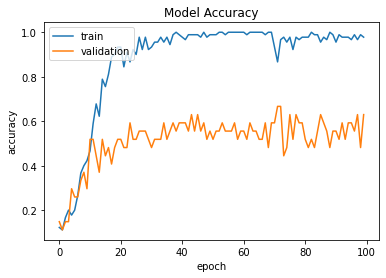

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

1 nghin


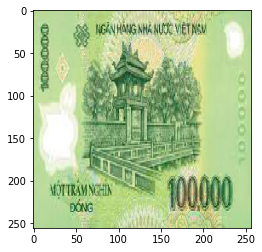

In [25]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('100.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])